In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

plt.rcParams['figure.dpi'] = 300
# Set float data type format
pd.options.display.float_format = '{:,.2f}'.format
# Set the maximum number of row to be displayed
pd.options.display.max_rows = 999
# Set global visualisation settings
plt.rc('font', size=14)   

### PART1: Employment

### Employment in London
- Olympics impact on employment rate & # total workforce in London
- Olympics impact on employment by industry (industry composition) in London

#### 1. Olympics impact on employment rate & # total workforce in London

In [2]:
boroughs = ['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
            'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
            'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
            'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
            'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
            'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
            'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'] # 32 boroughs
regions = ['North East', 'North West', 'Yorkshire and The Humber',
           'East Midlands', 'West Midlands', 'East', 'South East',
           'South West', 'London'] # 9 regions
countries = ['England', 'Wales', 'Scotland', 'Northern Ireland']  # 4 countries

# Great Britain consists of 'England', 'Wales', 'Scotland'; 
# United Kingdom consists of Great Britain and Northern Ireland;

In [3]:
path1 = '../datasets_full/London/'
path2 = '../datasets_full/London_more/'
activity_df = pd.read_csv(path1 + 'london_economic_activity.csv') 
employment_df = pd.read_csv(path2 + 'workforce-jobs-ons.csv')
try:
    activity_df['year'] = np.array([s.split(' ')[2] for s in activity_df['year']]).astype('int')
except:
    pass
activity_df = activity_df.dropna()

In [4]:
#### Economically active & Employment Rate by Sex
activity_df_total = activity_df.groupby(['year', 'area']).sum()
activity_df_total['employment_rate'] = activity_df_total['economically_active']/activity_df_total['working_age']*100
activity_df_total = activity_df_total.reset_index(level='area')
activity_df = activity_df.set_index('year')

In [5]:
display(activity_df_total.head())

area  economically_active  working_age  percent  \
year                                                                    
2005  Barking and Dagenham            72,400.00   105,000.00   138.50   
2005                Barnet           159,700.00   214,700.00   149.20   
2005                Bexley           111,800.00   140,600.00   159.30   
2005                 Brent           132,200.00   184,600.00   143.10   
2005               Bromley           156,400.00   188,900.00   165.80   

      confidence  employment_rate  
year                               
2005       10.50            68.95  
2005       11.00            74.38  
2005        9.70            79.52  
2005       10.40            71.61  
2005        8.70            82.80

In [6]:
employ_ratio = pd.pivot_table(activity_df, index=activity_df.index,
                              values=['economically_active', 
                                      'percent', 
                                      'confidence'], 
                              columns=['area', 'gender'])

In [7]:
display(employ_ratio.head())

confidence                                                  \
area   Barking and Dagenham      Barnet      Bexley      Brent      Bromley   
gender                    F    M      F    M      F    M     F    M       F   
year                                                                          
2005                   5.50 5.00   5.90 5.10   5.30 4.40  5.90 4.50    4.80   
2006                   5.40 5.00   5.50 4.80   5.10 4.20  6.00 5.30    5.20   
2007                   5.40 4.70   5.10 4.80   5.20 4.40  5.80 4.80    4.80   
2008                   5.10 4.70   5.00 4.40   5.40 4.70  5.40 4.10    5.00   
2009                   5.50 5.00   5.90 5.00   5.50 5.00  5.90 5.00    6.00   

             ...        percent                                             \
area         ... Waltham Forest       Wandsworth       West Midlands         
gender    M  ...              F     M          F     M             F     M   
year         ...                                                             
2005   3.90  ...          62.20 82.60      72.70 82.40         68.00 82.90   
2006   3.90  ...          67.70 76.50      70.50 84.70         68.10 82.90   
2007   3.50  ...          63.30 80.00      74.60 83.50         67.80 82.60   
2008   4.20  ...          58.40 81.00      76.10 86.30         68.20 82.50   
2009   4.50  ...          62.60 80.60      76.20 89.40         68.60 82.30   

                                                         
area   Westminster       Yorkshire and The Humber        
gender           F     M                        F     M  
year                                                     
2005         61.70 77.10                    68.90 83.10  
2006         62.30 73.30                    69.10 83.30  
2007         57.10 76.80                    68.80 82.20  
2008         59.90 77.30                    69.00 82.60  
2009         62.70 82.50                    69.00 81.70  

[5 rows x 288 columns]

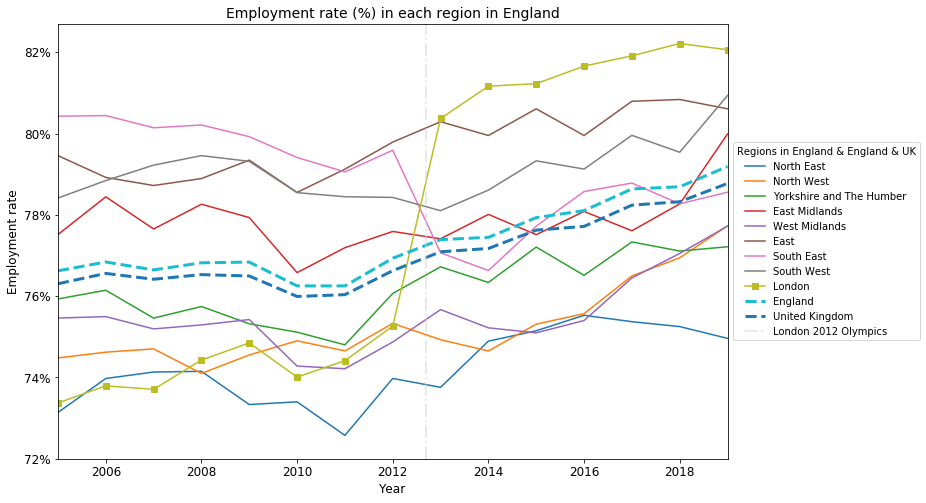

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))
for i, x in enumerate([*regions, 'England', 'United Kingdom']):
    df = activity_df_total.loc[(activity_df_total['area']==x), 'employment_rate']
    if x == 'London':
        df.plot(ax=ax, label=x, marker='s')
    elif x in ['England', 'United Kingdom']:
        df.plot(ax=ax, label=x, linestyle='dashed', linewidth=3)
    else: 
        df.plot(ax=ax, label=x)
ax.set_title('Employment rate (%) in each region in England', fontsize=14);
ax.set_xlabel('Year', fontsize=12);
ax.set_ylabel('Employment rate', fontsize=12);
ax.axvline(x=2012.7, linewidth=2, color='lightgray', linestyle='-.', alpha=0.5, label='London 2012 Olympics')
plt.xticks(fontsize=12);
plt.yticks(range(72, 83, 2), [str(x) + '%' for x in range(72, 83, 2)], fontsize=12) 
plt.legend()
ax.legend(loc='center left', title='Regions in England & England & UK', bbox_to_anchor=(1, 0.5));

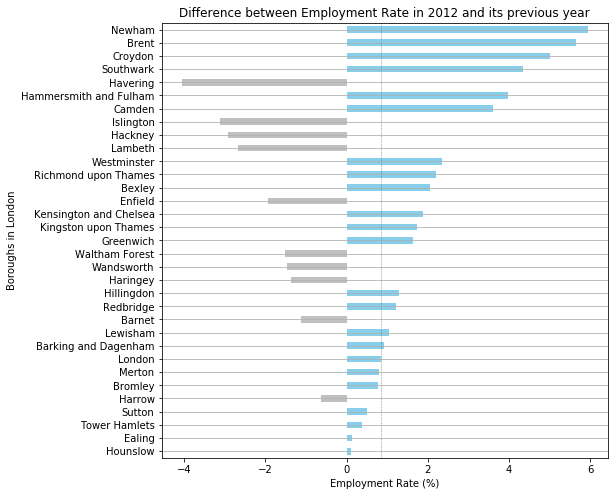

In [9]:
df3 = activity_df_total.loc[(activity_df_total.index >= 2011) & (activity_df_total.index <= 2012), :]
df3 = df3.reset_index()
rate_12 = df3.loc[df3['year'] == 2012, ['area', 'employment_rate']].set_index('area')
rate_11 = df3.loc[df3['year'] == 2011, ['area', 'employment_rate']].set_index('area')
diff = rate_12.subtract(rate_11)

fig, ax = plt.subplots(figsize=(8,8))

diff_sort = diff.reindex(diff['employment_rate'].abs().sort_values().index)
diff_sort['positive'] = (diff_sort['employment_rate'] > 0)

# plot 1
df_boroughs = diff_sort[diff_sort.index.isin([*boroughs, 'London'])]
df_boroughs['employment_rate'].plot.barh(ax=ax,color=df_boroughs.positive.map({True: 'skyblue', False: 'silver'}))
ax.yaxis.grid();
ax.axvline(x=df_boroughs.loc[df_boroughs.index=='London','employment_rate'].values, 
           linestyle='dashed', color='gray', linewidth=0.5)
ax.set_title('Difference between Employment Rate in 2012 and its previous year');
ax.set_xlabel('Employment Rate (%)');
ax.set_ylabel('Boroughs in London');

/Users/ruiyan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


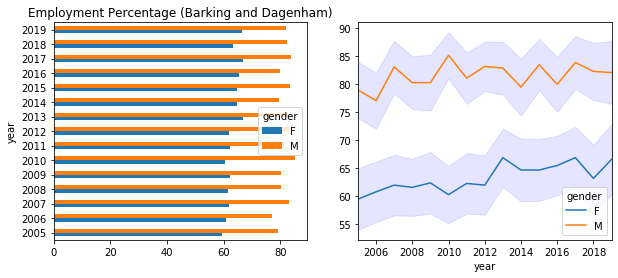

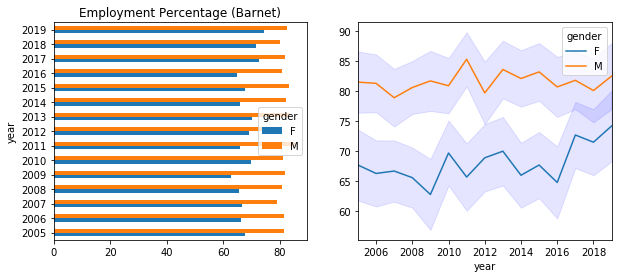

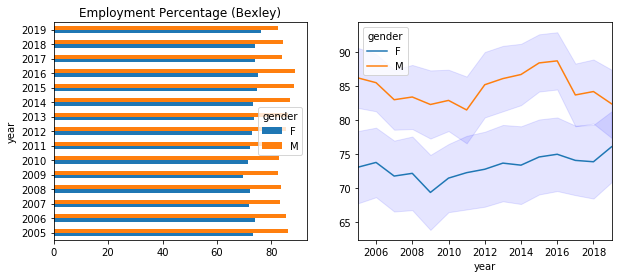

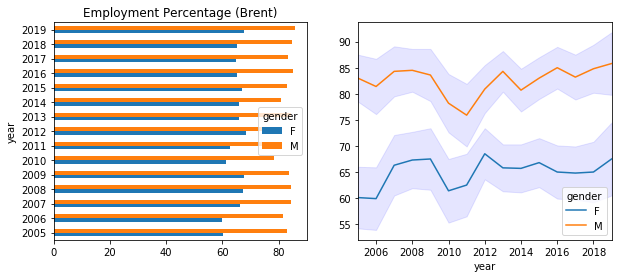

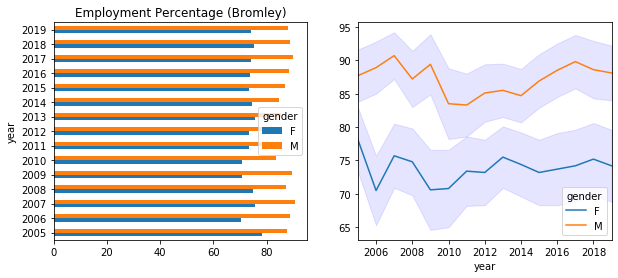

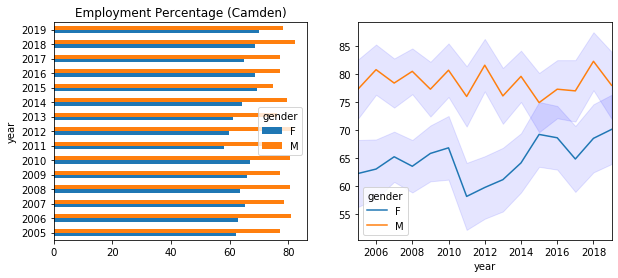

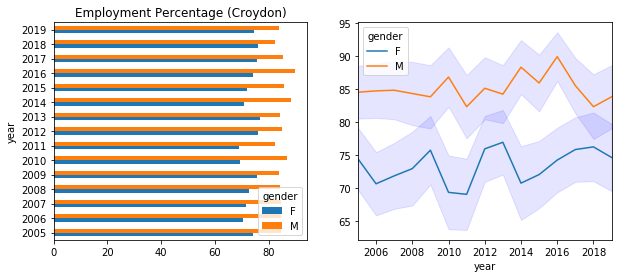

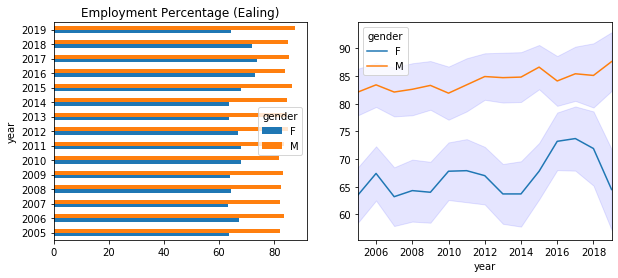

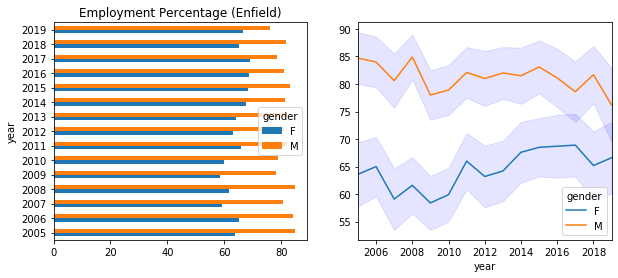

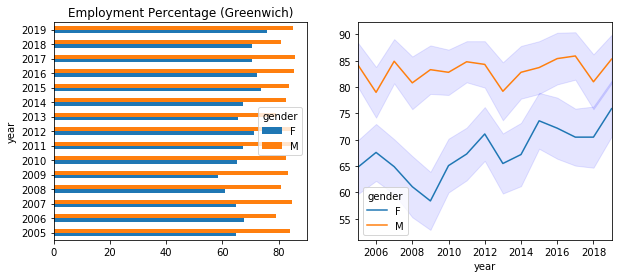

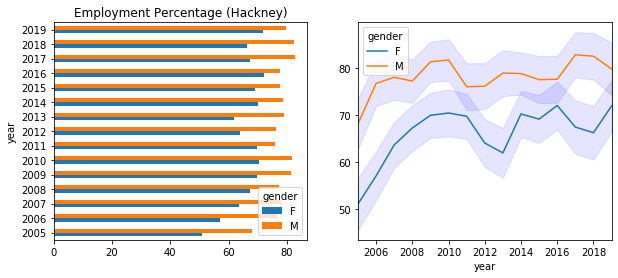

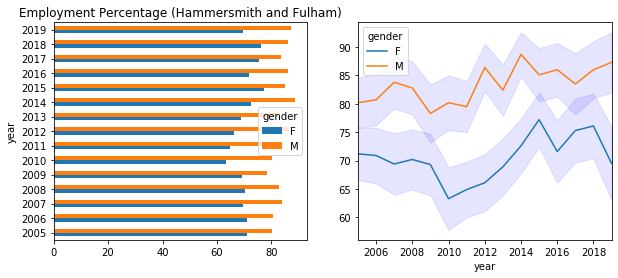

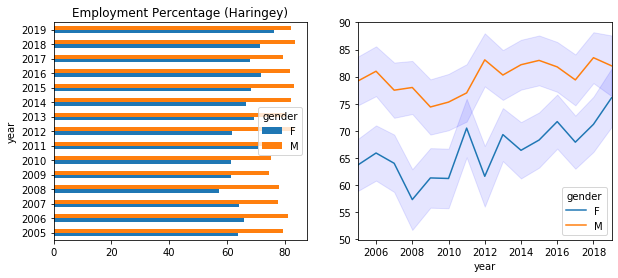

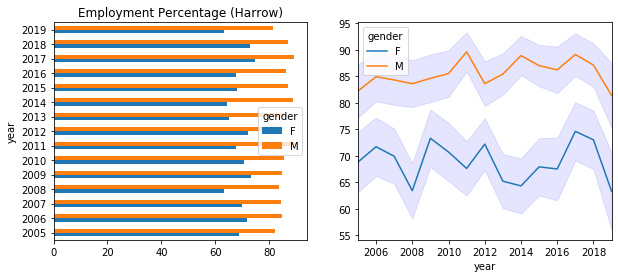

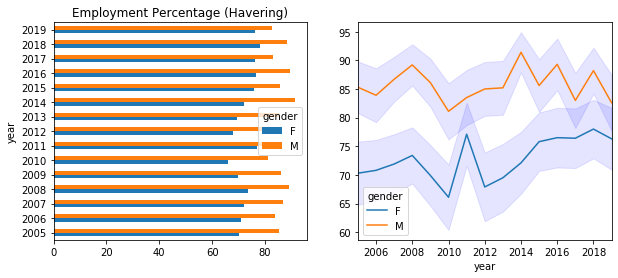

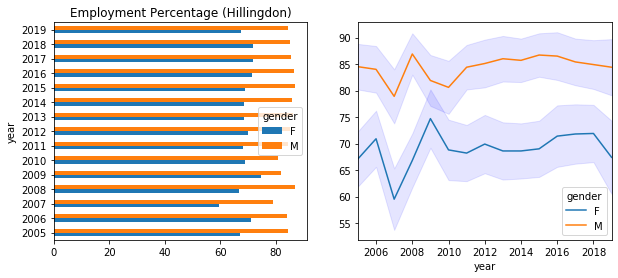

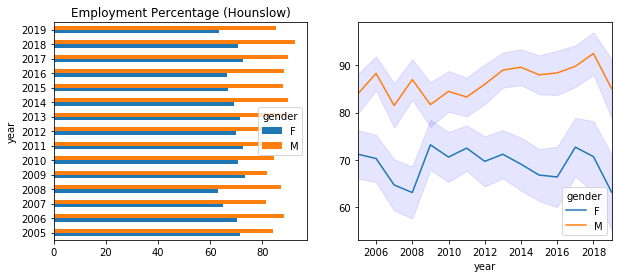

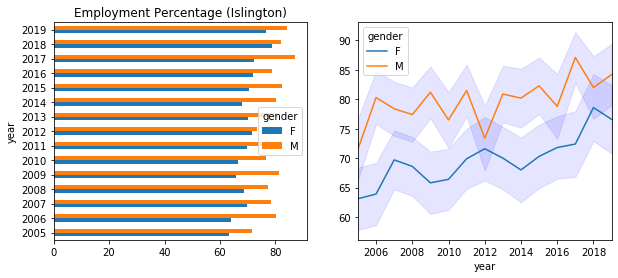

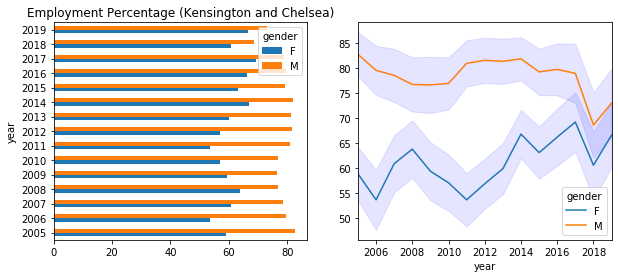

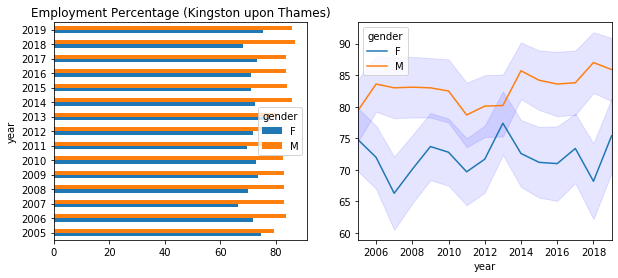

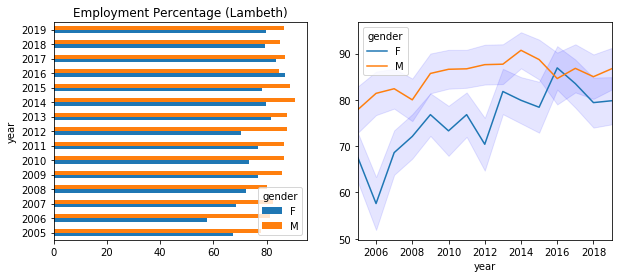

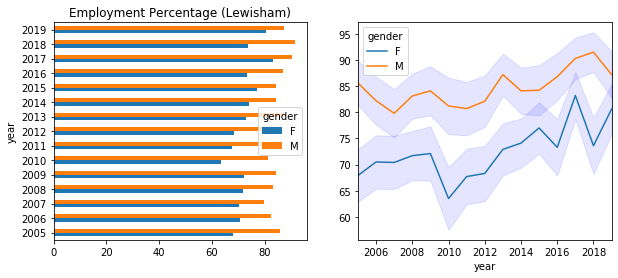

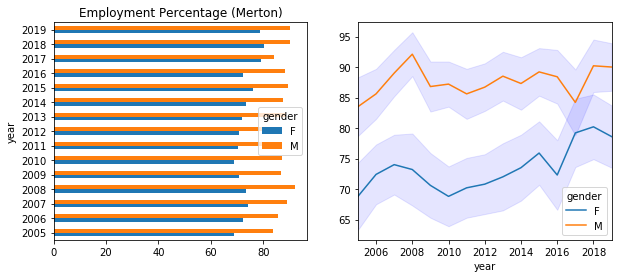

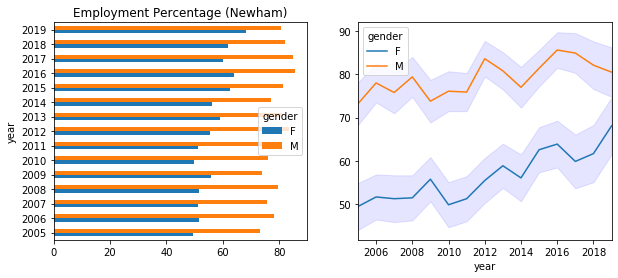

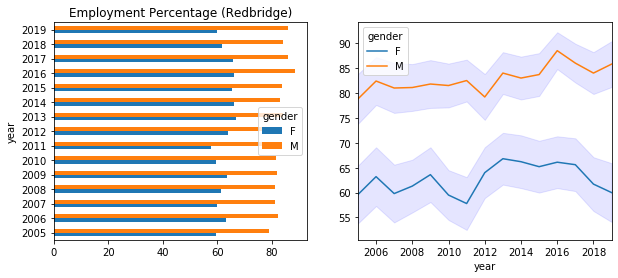

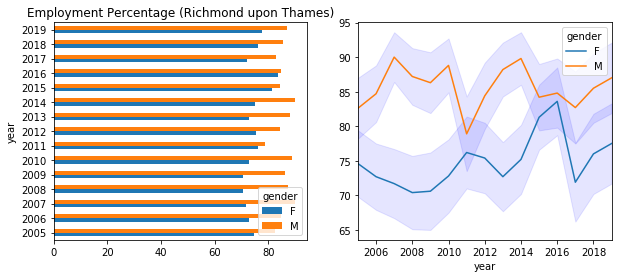

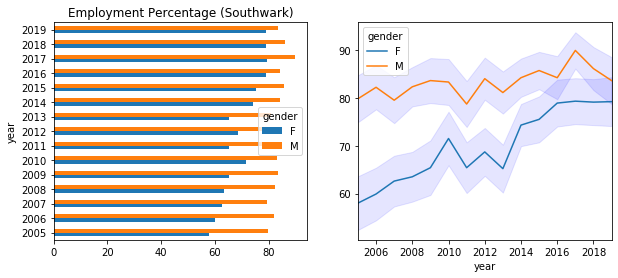

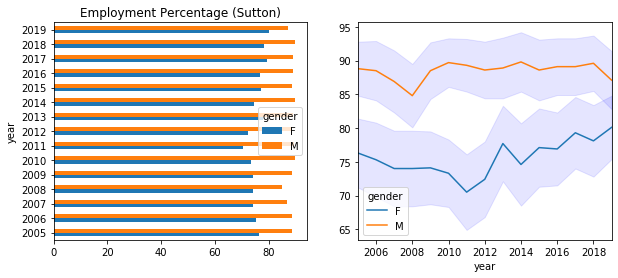

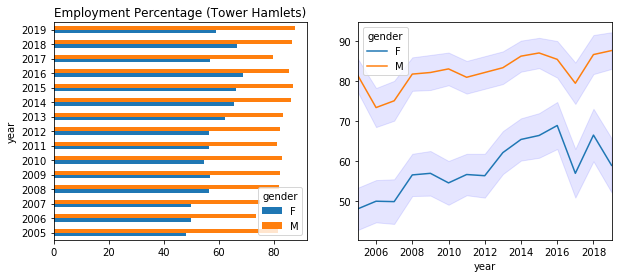

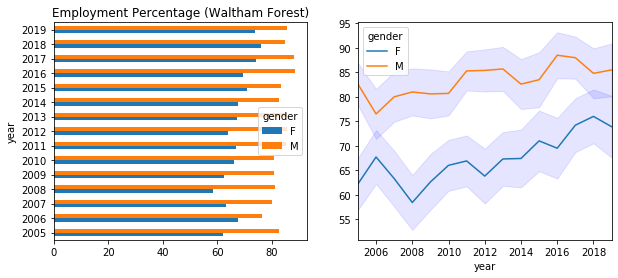

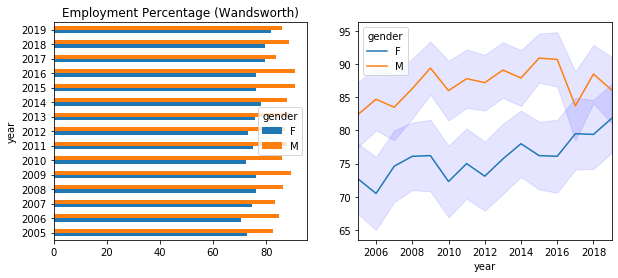

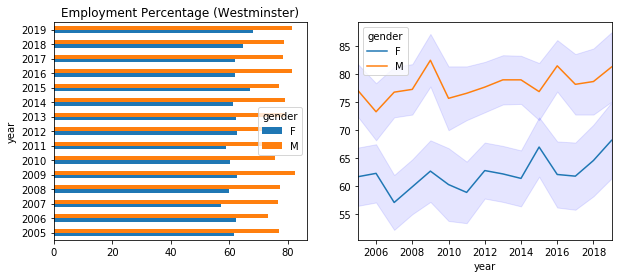

In [10]:
for region in boroughs:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    df = employ_ratio['percent'][region]
    df.plot.barh(ax=axes[0])
    axes[0].set_title('Employment Percentage ({})'.format(region))
    
    df_CI = employ_ratio['confidence'][region]
    df.plot(ax=axes[1])
    axes[1].fill_between(df_CI.index, (df['F']-df_CI['F']), (df['F']+df_CI['F']), color='b', alpha=.1)
    axes[1].fill_between(df_CI.index, (df['M']-df_CI['M']), (df['M']+df_CI['M']), color='b', alpha=.1)

In [11]:
#### Number of workforce jobs
display(employment_df.head())

date area  total_workforce_jobs  employee_jobs  self_employment_jobs
0  Mar-05   UK              31356985       27579660               3493495
1  Jun-05   UK              31403800       27625580               3501806
2  Sep-05   UK              31541152       27730717               3533639
3  Dec-05   UK              31628586       27784245               3569405
4  Mar-06   UK              31708853       27831410               3607458

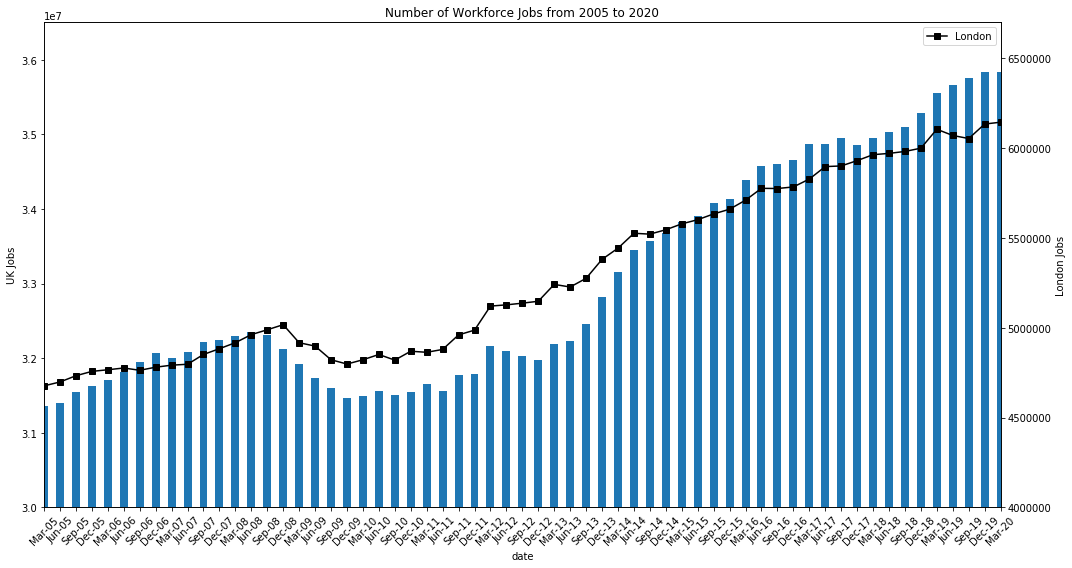

In [12]:
fig, ax1 = plt.subplots(figsize=(15,8))
try: 
#     employment_df['date'] = pd.to_datetime(employment_df['date'], format='%b-%y')
    employment_df = employment_df.set_index('date')
except:
    pass
# employment_df = employment_df['2005-03-01':'2015-03-01']

employment_df_UK = employment_df.loc[employment_df['area']=='UK', 'total_workforce_jobs']
employment_df_london = employment_df.loc[employment_df['area']=='London', 'total_workforce_jobs']

employment_df_UK.plot.bar(ax=ax1)
ax1.set_ylim(bottom=30000000, top=36500000)
ax1.set_ylabel('UK Jobs')
ax1.tick_params(axis='x', labelrotation=45)
ax1.set_title('Number of Workforce Jobs from 2005 to 2020')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
employment_df_london.plot.line(ax=ax2, marker='s', color='k', label='London')
ax2.set_ylim(4000000, 6700000)
ax2.set_ylabel('London Jobs')
plt.legend()
fig.tight_layout()  # otherwise the right y-label is slightly clipped

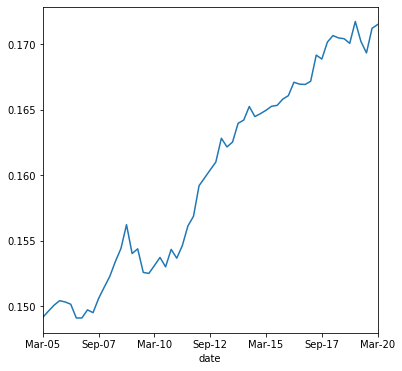

In [13]:
# london jobs/uk jobs
fig, ax = plt.subplots(figsize=(6,6))
(employment_df_london/employment_df_UK).plot()

#### 2. Olympics impact on employment by industry in London

In [14]:
pathh = '../datasets_full/London_more/'
employ_by_industry = pd.read_excel(open('{}employment-rate-by-industry.xlsx'.format(pathh), 'rb'), 
                                   sheet_name='Employ Industry Percent', header=[0, 1], index_col=0) 

In [15]:
boroughs = ['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
            'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
            'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
            'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
            'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
            'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
            'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'] # 32 boroughs
regions = ['North East', 'North West', 'Yorkshire and The Humber',
           'East Midlands', 'West Midlands', 'East', 'South East',
           'South West', 'London'] # 9 regions
countries = ['England', 'Wales', 'Scotland', 'Northern Ireland']  # 4 countries

In [16]:
employ_by_industry.columns = employ_by_industry.columns.swaplevel(0, 1)
employ_by_industry.index = np.array([s.split(' ')[2] for s in employ_by_industry.index]).astype(str)

In [17]:
display(employ_by_industry)

London                                   UK  \
 (SIC 2007) A:agriculture and fishing A:agriculture and fishing (SIC 2007)   
2004                             0.10                                 1.00   
2005                             0.10                                 1.00   
2006                             0.10                                 1.00   
2007                             0.20                                 1.00   
2008                             0.20                                 1.10   
2009                             0.10                                 1.10   
2010                             0.10                                 1.20   
2011                             0.00                                 1.20   
2012                             0.00                                 1.20   
2013                             0.10                                 1.10   
2014                             0.10                                 1.20   
2015                             0.10                                 1.10   
2016                             0.00                                 1.10   
2017                             0.10                                 1.10   
2018                             0.10                                 1.10   
2019                             0.10                                 1.00   

                            London                                UK  \
 (SIC 2007) B,D,E:energy and water B,D,E:energy and water (SIC 2007)   
2004                          0.80                              1.40   
2005                          0.70                              1.40   
2006                          0.80                              1.50   
2007                          1.10                              1.60   
2008                          1.10                              1.70   
2009                          0.80                              1.70   
2010                          0.60                              1.60   
2011                          1.00                              1.80   
2012                          0.80                              1.70   
2013                          0.90                              1.80   
2014                          0.90                              1.80   
2015                          0.90                              1.70   
2016                          0.80                              1.70   
2017                          0.80                              1.70   
2018                          0.80                              1.70   
2019                          0.80                              1.70   

                     London                         UK         London  \
 (SIC 2007) C:manufacturing C:manufacturing (SIC 2007) F:construction   
2004                   5.60                      13.10           7.30   
2005                   5.30                      12.50           7.40   
2006                   5.50                      12.20           7.60   
2007                   6.30                      12.10           7.50   
2008                   5.60                      11.40           7.20   
2009                   3.90                       9.80           7.10   
2010                   3.70                       9.90           6.60   
2011                   3.80                       9.80           7.00   
2012                   3.50                       9.80           6.80   
2013                   3.60                       9.70           7.00   
2014                   3.60                       9.70           6.60   
2015                   3.70                       9.50           7.20   
2016                   3.70                       9.30           6.80   
2017                   3.70                       9.20           6.90   
2018                   3.10                       9.00           6.70   
2019                   3.20                       8.90           7.00   

              

In [18]:
df_london = employ_by_industry['London']
df_london.columns = [s.split(':')[1].capitalize() for s in df_london.columns]
df_london = df_london[df_london.columns[~df_london.columns.isin(['Agriculture and fishing', 'Total services'])]]
df_london.index = df_london.index.astype(int)

In [19]:
df_UK = employ_by_industry['UK']
df_UK.columns = [s.split(':')[1].capitalize().split(' (')[0] for s in df_UK.columns]
df_UK = df_UK[df_UK.columns[~df_UK.columns.isin(['Agriculture and fishing', 'Total services'])]]

In [20]:
IO = ['Construction', 
      'Distribution, hotels and restaurants', 
      'Transport and communications']
df_london_IO = df_london.copy()
df_london_IO['Others'] = df_london_IO.loc[:, ~df_london_IO.columns.isin(IO)].sum(axis=1)

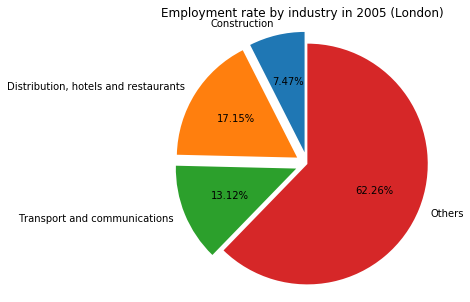

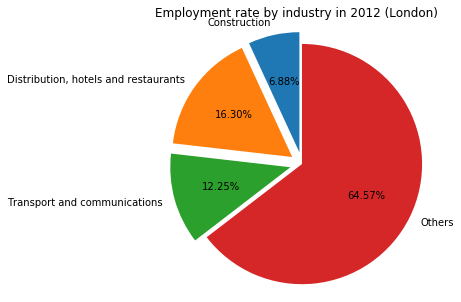

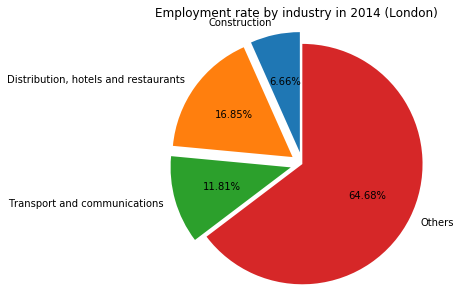

In [21]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
for year in [2005, 2012, 2014]:
    df_plot = df_london_IO.loc[df_london_IO.index==year, [*IO, 'Others']]
    labels = df_plot.columns
    london_perct = np.array(*df_plot.values)
    # UK_perct = df_UK.loc[df_UK.index==year, :] * 100
    fig, ax = plt.subplots(figsize=(5, 5))
    explode = [(s in ['Construction', 'Distribution, hotels and restaurants', 
                      'Transport and communications'])*0.1 for s in labels]
    ax.pie(london_perct, explode=explode, labels=labels, autopct='%1.2f%%', startangle=90)
    #pctdistance=0.9, radius=1.2)
    # wedges, texts, autotexts = axes[1].pie(UK_perct, labels=None, autopct='%1.2f%%', pctdistance=0.9, radius=1.2)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.set_title('Employment rate by industry in {} (London)'.format(year), fontsize=12)
    # ax.set_title('Employment rate by industry in {} (UK)'.format(year))
#     ax.legend(wedges, london_perct, title="Industries", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()

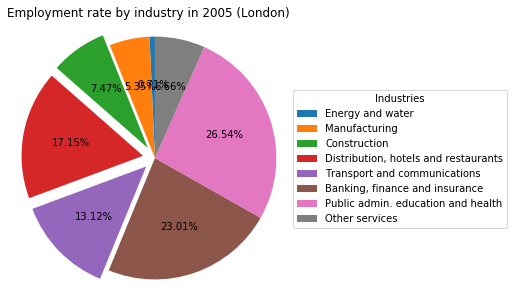

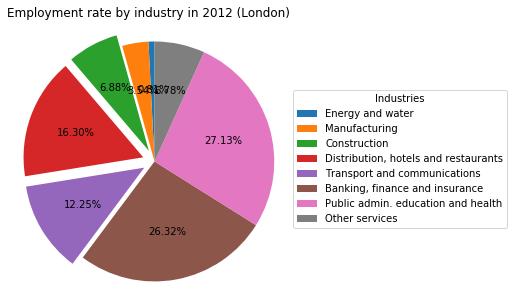

In [22]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = df_london.columns
for year in [2005, 2012]:
    df_plot = df_london.loc[df_london.index == year, :]
    london_perct = np.array(*df_plot.values)
    fig, ax = plt.subplots(figsize=(5, 5))
    explode = [(s in ['Construction', 'Distribution, hotels and restaurants', 
                      'Transport and communications']) * 0.1 for s in labels]
    wedges, texts, autotexts = ax.pie(london_perct, explode=explode, 
                                      autopct='%1.2f%%', startangle=90)
    ax.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.set_title('Employment rate by industry in {} (London)'.format(year))
    ax.legend(wedges, labels, title="Industries", 
              loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()

/Users/ruiyan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


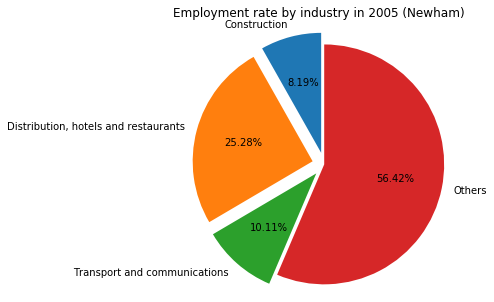

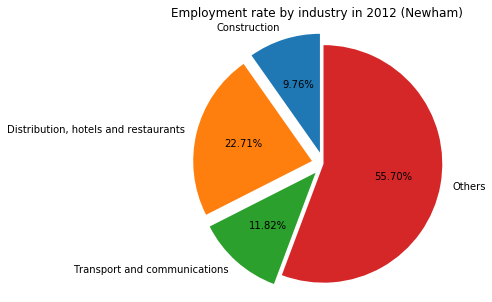

In [23]:
df_sets = {}

for year in [2005, 2012]:
    df = pd.read_excel(open(pathh + 'employment-rate-by-industry.xlsx', 'rb'), 
                       sheet_name=str(year), header=[0, 1], index_col=0)
    df.columns = df.columns.swaplevel(0, 1)
    df_percent = df.loc[:, ['Area','percent']]
    df_percent = df_percent.set_index('Area')['percent']
    df_percent.columns = [s.split(':')[1].capitalize() for s in df_percent.columns]

    IO = ['Construction', 'Distribution, hotels and restaurants', 'Transport and communications']
    df_IO = df_percent.copy()
    df_IO = df_IO.replace('!', np.nan)
    df_IO = df_IO[df_IO.columns[~df_IO.columns.isin(['Agriculture and fishing', 'Total services'])]]    
    df_IO['Others'] = df_IO.loc[:, ~df_IO.columns.isin(IO)].sum(axis=1)
    
    df_IO.index = [s[0] for s in df_IO.index]
    df_plot = df_IO.loc[:, [*IO, 'Others']]

    fig, ax = plt.subplots(figsize=(5, 5))
    explode = [(s in IO)*0.1 for s in df_plot.columns]
    ax.pie(df_plot.loc[df_plot.index=='Newham', :], explode=explode, labels=df_plot.columns, 
           autopct='%1.2f%%', startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.set_title('Employment rate by industry in {} (Newham)'.format(year), fontsize=12)
    plt.show()

### Employment in Brazil

In [24]:
path = '../datasets_full/Rio/'
brazil = pd.read_csv(path + 'brazil_unemployment.csv')  # Rio, Brazil

In [25]:
df_employed = brazil.loc[brazil['category']=='Workforce - Employed',:].set_index(['year', 'quarter', 'state'])
df_employed = df_employed.rename(columns={'value': 'employed_population'})
display(df_employed)

df_unemployed = brazil.loc[brazil['category']=='Workforce - Unemployed',:].set_index(['year', 'quarter', 'state'])
df_unemployed = df_unemployed.rename(columns={'value': 'unemployed_population'})

df = pd.concat([df_employed, df_unemployed], axis=1, join='inner')
df['employment_rate'] = df['employed_population']/(df['employed_population'] + df['unemployed_population'])
display(df)

category  employed_population
year quarter state                                                         
2012 Q1      Rondônia             Workforce - Employed                  701
             Acre                 Workforce - Employed                  286
             Amazonas             Workforce - Employed                 1392
             Roraima              Workforce - Employed                  170
             Pará                 Workforce - Employed                 3123
             Amapá                Workforce - Employed                  279
             Tocantins            Workforce - Employed                  597
             Maranhão             Workforce - Employed                 2505
             Piauí                Workforce - Employed                 1314
             Ceará                Workforce - Employed                 3475
             Rio Grande do Norte  Workforce - Employed                 1205
             Paraíba              Workforce - Employed                 1499
             Pernambuco           Workforce - Employed                 3537
             Alagoas              Workforce - Employed                 1033
             Sergipe              Workforce - Employed                  848
             Bahia                Workforce - Employed                 6074
             Minas Gerais         Workforce - Employed                 9282
             Espírito Santo       Workforce - Employed                 1715
             Rio de Janeiro       Workforce - Employed                 7330
             São Paulo            Workforce - Employed                20541
             Paraná               Workforce - Employed                 5196
             Santa Catarina       Workforce - Employed                 3254
             Rio Grande do Sul    Workforce - Employed                 5396
             Mato Grosso do Sul   Workforce - Employed                 1124
             Mato Grosso          Workforce - Employed                 1460
             Goiás                Workforce - Employed                 3004
             Distrito Federal     Workforce - Employed                 1292
     Q2      Rondônia             Workforce - Employed                  732
             Acre                 Workforce - Employed                  299
             Amazonas             Workforce - Employed                 1417
             Roraima              Workforce - Employed                  176
             Pará                 Workforce - Employed                 3294
             Amapá                Workforce - Employed                  270
             Tocantins            Workforce - Employed                  602
             Maranhão             Workforce - Employed                 2494
             Piauí                Workforce - Employed                 1324
             Ceará                Workforce - Employed                 3420
             Rio Grande do Norte  Workforce - Employed                 1279
             Paraíba              Workforce - Employed                 1521
             Pernambuco           Workforce - Employed                 3512
             Alagoas              Workforce - Employed                 1016
             Sergipe              Workforce - Employed                  858
             Bahia                Workforce - Employed                 6107
             Minas Gerais         Workforce - Employed                 9631
             Espírito Santo       Workforce - Employed                 1768
             Rio de Janeiro       Workforce - Employed                 7481
             São Paulo            Workforce - Employed                20814
             Paraná               Workforce - Employed                 5304
             Santa Catarina       Workforce - Employed                 3326
             Rio Grande do Sul    Workforce - Employed                 5457
             Mato Grosso do Sul   Workforce - Employed                 1166
             Mato 

category  employed_population  \
year quarter state                                                            
2012 Q1      Rondônia             Workforce - Employed                  701   
             Acre                 Workforce - Employed                  286   
             Amazonas             Workforce - Employed                 1392   
             Roraima              Workforce - Employed                  170   
             Pará                 Workforce - Employed                 3123   
             Amapá                Workforce - Employed                  279   
             Tocantins            Workforce - Employed                  597   
             Maranhão             Workforce - Employed                 2505   
             Piauí                Workforce - Employed                 1314   
             Ceará                Workforce - Employed                 3475   
             Rio Grande do Norte  Workforce - Employed                 1205   
             Paraíba              Workforce - Employed                 1499   
             Pernambuco           Workforce - Employed                 3537   
             Alagoas              Workforce - Employed                 1033   
             Sergipe              Workforce - Employed                  848   
             Bahia                Workforce - Employed                 6074   
             Minas Gerais         Workforce - Employed                 9282   
             Espírito Santo       Workforce - Employed                 1715   
             Rio de Janeiro       Workforce - Employed                 7330   
             São Paulo            Workforce - Employed                20541   
             Paraná               Workforce - Employed                 5196   
             Santa Catarina       Workforce - Employed                 3254   
             Rio Grande do Sul    Workforce - Employed                 5396   
             Mato Grosso do Sul   Workforce - Employed                 1124   
             Mato Grosso          Workforce - Employed                 1460   
             Goiás                Workforce - Employed                 3004   
             Distrito Federal     Workforce - Employed                 1292   
     Q2      Rondônia             Workforce - Employed                  732   
             Acre                 Workforce - Employed                  299   
             Amazonas             Workforce - Employed                 1417   
             Roraima              Workforce - Employed                  176   
             Pará                 Workforce - Employed                 3294   
             Amapá                Workforce - Employed                  270   
             Tocantins            Workforce - Employed                  602   
             Maranhão             Workforce - Employed                 2494   
             Piauí                Workforce - Employed                 1324   
             Ceará                Workforce - Employed                 3420   
             Rio Grande do Norte  Workforce - Employed                 1279   
             Paraíba              Workforce - Employed                 1521   
             Pernambuco           Workforce - Employed                 3512   
             Alagoas              Workforce - Employed                 1016   
             Sergipe              Workforce - Employed                  858   
             Bahia                Workforce - Employed                 6107   
             Minas Gerais         Workforce - Employed                 9631   
             Espírito Santo       Workforce - Employed                 1768   
             Rio de Janeiro       Workforce - Employed                 7481   
             São Paulo            Workforce - Employed                20814   
             Paraná               Workforce - Employed                 5304   
             Santa Catarina       Workforce - Employed                 3326   
             Rio 

In [26]:
df_employed_rate = df['employment_rate']
df_employed_rate = df_employed_rate.reset_index(level='state')
display(df_employed_rate)

state  employment_rate
year quarter                                      
2012 Q1                  Rondônia             0.92
     Q1                      Acre             0.91
     Q1                  Amazonas             0.89
     Q1                   Roraima             0.91
     Q1                      Pará             0.92
     Q1                     Amapá             0.87
     Q1                 Tocantins             0.92
     Q1                  Maranhão             0.92
     Q1                     Piauí             0.92
     Q1                     Ceará             0.93
     Q1       Rio Grande do Norte             0.89
     Q1                   Paraíba             0.90
     Q1                Pernambuco             0.90
     Q1                   Alagoas             0.89
     Q1                   Sergipe             0.90
     Q1                     Bahia             0.88
     Q1              Minas Gerais             0.92
     Q1            Espírito Santo             0.92
     Q1            Rio de Janeiro             0.91
     Q1                 São Paulo             0.92
     Q1                    Paraná             0.94
     Q1            Santa Catarina             0.96
     Q1         Rio Grande do Sul             0.95
     Q1        Mato Grosso do Sul             0.93
     Q1               Mato Grosso             0.93
     Q1                     Goiás             0.94
     Q1          Distrito Federal             0.91
     Q2                  Rondônia             0.94
     Q2                      Acre             0.91
     Q2                  Amazonas             0.91
     Q2                   Roraima             0.94
     Q2                      Pará             0.92
     Q2                     Amapá             0.85
     Q2                 Tocantins             0.92
     Q2                  Maranhão             0.91
     Q2                     Piauí             0.93
     Q2                     Ceará             0.92
     Q2       Rio Grande do Norte             0.89
     Q2                   Paraíba             0.91
     Q2                Pernambuco             0.92
     Q2                   Alagoas             0.88
     Q2                   Sergipe             0.89
     Q2                     Bahia             0.89
     Q2              Minas Gerais             0.93
     Q2            Espírito Santo             0.93
     Q2            Rio de Janeiro             0.93
     Q2                 São Paulo             0.92
     Q2                    Paraná             0.95
     Q2            Santa Catarina             0.96
     Q2         Rio Grande do Sul             0.95
     Q2        Mato Grosso do Sul             0.93
     Q2               Mato Grosso             0.94
     Q2                     Goiás             0.95
     Q2          Distrito Federal             0.92
     Q3                  Rondônia             0.94
     Q3                      Acre             0.92
     Q3                  Amazonas             0.91
     Q3                   Roraima             0.93
     Q3                      Pará             0.93
     Q3                     Amapá             0.86
     Q3                 Tocantins             0.93
     Q3                  Maranhão             0.92
     Q3                     Piauí             0.94
     Q3                     Ceará             0.92
     Q3       Rio Grande do Norte             0.89
     Q3                   Paraíba             0.92
     Q3                Pernambuco             0.91
     Q3                   Alagoas             0.89
     Q3                   Sergipe             0.90
     Q3                     Bahia             0.89
     Q3              Minas Gerais             0.94
     Q3            Espírito Santo             0.93
     Q3            Rio de Janeiro             0.93
     Q3                 São Paulo             0.93
     Q3                    Paraná             0.95
     Q3            Santa Catarina             0.97
     Q3         Rio Grande do Sul             0.95

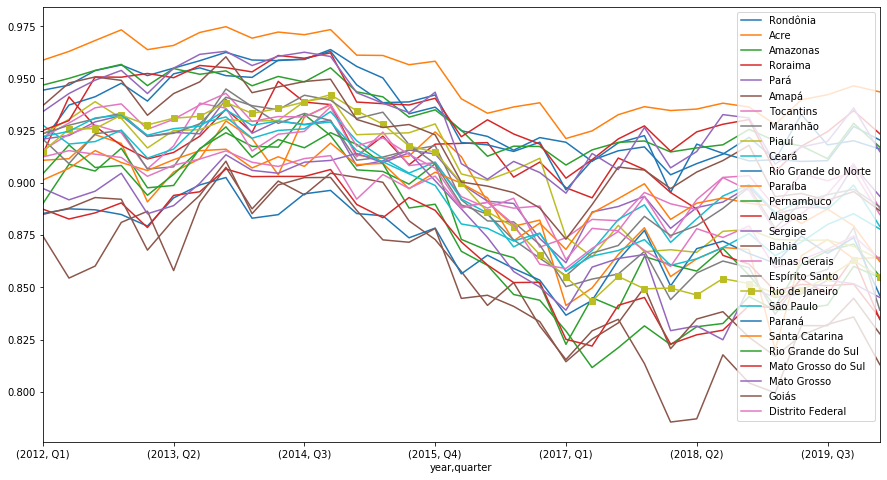

In [27]:
fig, ax = plt.subplots(figsize=(15, 8))
for state in df_employed_rate.state.unique():
    df_plot = df_employed_rate.loc[df_employed_rate['state']==state, 'employment_rate']
    if state=='Rio de Janeiro':
        df_plot.plot(ax=ax, label=state, marker='s')
    else:
        df_plot.plot(ax=ax, label=state)
ax.legend(loc='center left', title='States of Brazil', bbox_to_anchor=(1, 0.5));
plt.legend()

### PART2: Income
- London
- Vancouver

In [28]:
import geopandas as gpd
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from pylab import rcParams
rcParams['figure.figsize'] = 15, 12

#### Income in London
- Mean and median income by area since 2000
- Total income by area since 2000
- Total income for the whole city since 2000
- Low income population percentage by area (*TODO*)

In [29]:
london_raw = pd.read_csv('../datasets_full/London/london_taxpayer_income.csv') # London, UK, 2012

In [30]:
try:
    london_raw['year'] = [s.split('-')[1] for s in london_raw['year']]
except:
    pass
london = london_raw.set_index('year')
london.index = london.index.astype('int')

In [31]:
display(london.head())

area_code            area  population  mean_income  median_income
year                                                                  
2000      00AA  City of London       10000       109800          40400
2001      00AA  City of London       10000       137000          65000
2002      00AA  City of London       12000        92900          38300
2003      00AA  City of London       11000        78700          37000
2004      00AA  City of London       10000        85800          39200

In [32]:
income_by_area = pd.pivot_table(london, index=london.index,  
                                values=['mean_income', 'median_income'], columns='area')

newham_mean_income = income_by_area['mean_income'].loc[:, 'Newham']
london_mean_income = income_by_area['mean_income'].loc[:, 'London']
england_mean_income = income_by_area['mean_income'].loc[:, 'England']

In [33]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=newham_mean_income.index, 
                         y=newham_mean_income.values,
                         mode='lines',
                         name='Newham Mean Income',
                        ))

fig.add_trace(go.Scatter(x=london_mean_income.index, 
                         y=london_mean_income.values,
                         mode='lines',
                         name='London Mean Income',
                        ))

fig.add_trace(go.Scatter(x=england_mean_income.index, 
                         y=england_mean_income.values,
                         mode='lines',
                         name='England Mean House Price',
                        ))


fig.update_layout(
    template='gridon',
    title='Average Yearly Income',
    xaxis_title='Year',
    yaxis_title='Income',
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    legend=dict(y=-.2, orientation='h'),
    shapes=[
        dict(
            type="line",
            x0=2005,
            x1=2005,
            y0=0,
            y1=london_mean_income.values.max()*1.2,
            line=dict(
            color="LightGray",
            dash="dashdot"
            )
        ),
        dict(
            type="rect",
            x0=2008,
            y0=0,
            x1=2009,
            y1=london_mean_income.values.max()*1.2,
            fillcolor="LightGray",
            opacity=0.5,
            layer="below",
            line_width=0,
        ),
        dict(
            type="line",
            x0=2012,
            x1=2012,
            y0=0,
            y1=london_mean_income.values.max()*1.2,
            line=dict(
            color="LightGray",
            dash="dashdot"
            )
        ),
        dict(
            type="line",
            x0=2016,
            x1=2016,
            y0=0,
            y1=london_mean_income.values.max()*1.2,
            line=dict(
            color="LightGray",
            dash="dashdot"
            )
        ),
    ],
    annotations=[
            dict(text="Olympics bidding succeeds", x=2005, y=london_mean_income.values.max()*1.2),
            dict(text="The Great Recession", x=2008, y=london_mean_income.values.max()*1.1),
            dict(text="London 2012 Olympics game", x=2012, y=london_mean_income.values.max()*1.2),
            dict(text="Brexit Vote", x=2016, y=london_mean_income.values.max()*1.1),
    ]
)

fig.show()

Index(['Newham', 'Barking and Dagenham', 'Waltham Forest', 'Bexley', 'Brent',
       'Lewisham', 'Havering', 'Croydon', 'Hillingdon', 'Enfield'],
      dtype='object', name='area')


Text(0.5, 0, 'Year')

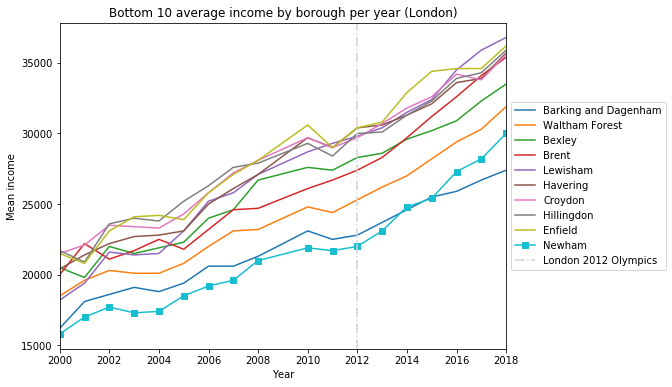

In [34]:
# London: Mean and median income by area since 2000
# mean by area
london = london.loc[london['area'].isin(boroughs), :]
income_by_area = pd.pivot_table(london, index=london.index,  
                                values=['mean_income', 'median_income'], columns='area')

# Average of mean_income over years
mean_top10 = income_by_area['mean_income'].mean().sort_values(ascending=False)[:10].index # top 10 area
mean_bottom10 = income_by_area['mean_income'].mean().sort_values()[:10].index
# print(mean_top10)
print(mean_bottom10)

# Average of median_income over years
median_top10 = income_by_area['median_income'].mean().sort_values(ascending=False)[:10].index # top 10 area
median_bottom10 = income_by_area['median_income'].mean().sort_values()[:10].index
# print(median_top10)
# print(median_bottom10)

# plots of top10 and bottom10 mean_income_by_area
fig, ax = plt.subplots(figsize=(8,6))
# income_by_area['mean_income'].loc[:, mean_top10.values].plot(ax=axes[0])
# axes[0].axvline(x=2012)
# axes[0].set_ylabel('Mean income')
# axes[0].set_title('Top 10 mean income by area per year (London)')
# axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.5));
income_by_area['mean_income'].loc[:, mean_bottom10.values[mean_bottom10.values!='Newham']].plot(ax=ax);
income_by_area['mean_income'].loc[:, 'Newham'].plot(ax=ax, marker='s', legend=False);
ax.axvline(x=2012, color='lightgray', linestyle='-.', label='London 2012 Olympics')
ax.set_ylabel('Mean income')
ax.set_title('Bottom 10 average income by borough per year (London)')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));
ax.set_xlabel('Year')

# plot of top10 and bottom10 median_income_by_area
# fig, axes = plt.subplots(2, 1, figsize=(10,8))
# income_by_area['median_income'].loc[:, median_top10.values].plot(ax=axes[0])
# axes[0].axvline(x=2012)
# axes[0].set_ylabel('Median income')
# axes[0].set_title('Top 10 median income by area per year (London)')
# axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.5));

# income_by_area['median_income'].loc[:, median_bottom10.values[median_bottom10.values!='Newham']].plot(ax=axes[1]);
# income_by_area['median_income'].loc[:, 'Newham'].plot(ax=axes[1], marker='o', legend=False);
# axes[1].axvline(x=2012)
# axes[1].set_ylabel('Median income')
# axes[1].set_title('Bottom 10 median income by area per year (London)')
# axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5));
# plt.tight_layout()

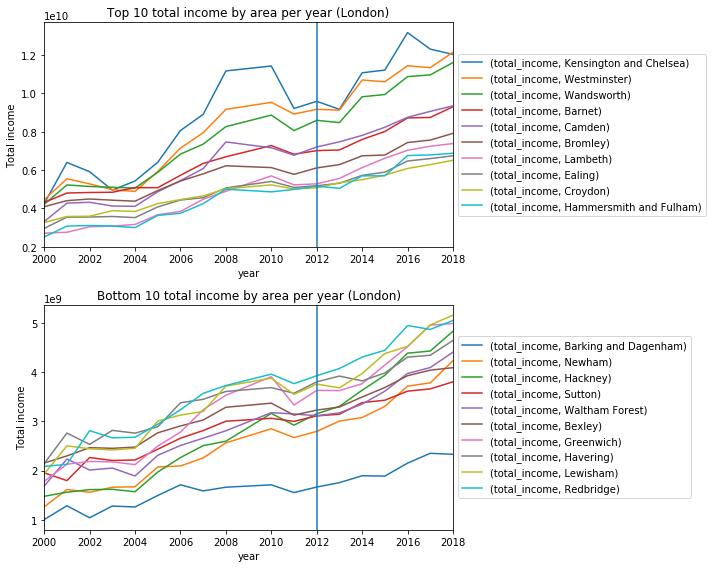

In [35]:
# London: Total income by area since 2000
london['total_income'] = london['mean_income'] * london['population'] 

total_income_by_area = pd.pivot_table(london, index=london.index,  
                                      values=['total_income'], columns='area')

total_top10 = total_income_by_area.mean().sort_values(ascending=False)[:10].index # top 10 area
total_bottom10 = total_income_by_area.mean().sort_values()[:10].index
# display(total_income_by_area.mean().sort_values(ascending=False))

fig, axes = plt.subplots(2, 1, figsize=(10,8))
total_income_by_area.loc[:, total_top10.values].plot(ax=axes[0])
axes[0].axvline(x=2012)
axes[0].set_ylabel('Total income')
axes[0].set_title('Top 10 total income by area per year (London)')
axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.5));

total_income_by_area.loc[:, total_bottom10.values].plot(ax=axes[1]);
axes[1].axvline(x=2012)
axes[1].set_ylabel('Total income')
axes[1].set_title('Bottom 10 total income by area per year (London)')
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.tight_layout()

In [36]:
mean_income_by_area = income_by_area['mean_income']
mean_income_by_area.index = mean_income_by_area.index.astype(int)

In [37]:
# Calculate the yealy average price percentage change
# yearly_income_london_pct_ch = (mean_income_by_area - mean_income_by_area.loc[2011,:])/mean_income_by_area.loc[2011,:]
yearly_income_london_pct_ch = mean_income_by_area.apply(lambda x: x.pct_change())
yearly_income_london_pct_ch = yearly_income_london_pct_ch.T
del yearly_income_london_pct_ch[2000]

In [38]:
fig = go.Figure(data=go.Heatmap(
        z=yearly_income_london_pct_ch.values,
        x=yearly_income_london_pct_ch.columns,
        y=yearly_income_london_pct_ch.index,
        colorscale='Viridis'))

fig.update_layout(
    title='Yearly Average London Income Percentage Change by Borough',
    title_x=0.5,
    yaxis_nticks=33,
    xaxis_title='Year',
    yaxis_title='Borough'
)

fig['layout']['yaxis']['autorange'] = "reversed"

fig.show()

In [39]:
newham_mean_income_change = (newham_mean_income - newham_mean_income.values[0])/newham_mean_income.values[0]
london_mean_income_change = (london_mean_income - london_mean_income.values[0])/london_mean_income.values[0]
england_mean_income_change = (england_mean_income - england_mean_income.values[0])/england_mean_income.values[0]

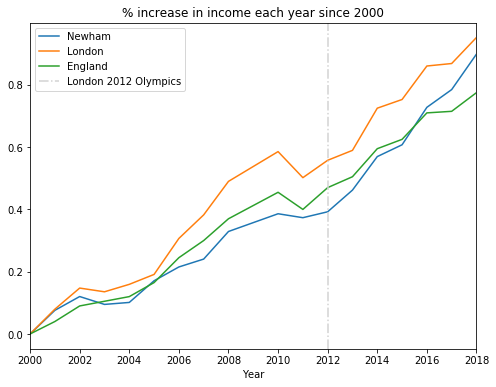

In [40]:
fig, ax = plt.subplots(figsize=(8,6))
pd.plotting.register_matplotlib_converters()
newham_mean_income_change.plot(ax=ax, label='Newham')
london_mean_income_change.plot(ax=ax, label='London')
england_mean_income_change.plot(ax=ax, label='England')
ax.set_title('% increase in income each year since 2000')
ax.axvline(x=2012, color='lightgray', linestyle='-.', label='London 2012 Olympics')
ax.set_xlabel('Year')
plt.legend()

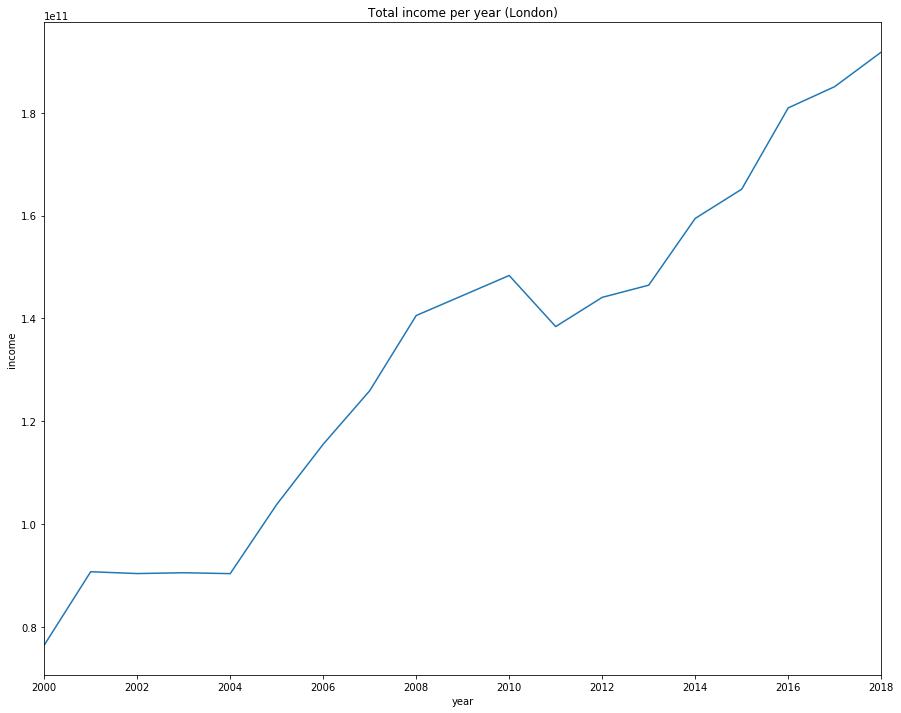

In [41]:
# London: Total income since 2000
fig, ax = plt.subplots()
total_income = london['total_income'].groupby(london.index).sum()
total_income.plot(ax=ax)
ax.set_ylabel('income');
ax.set_title('Total income per year (London)');

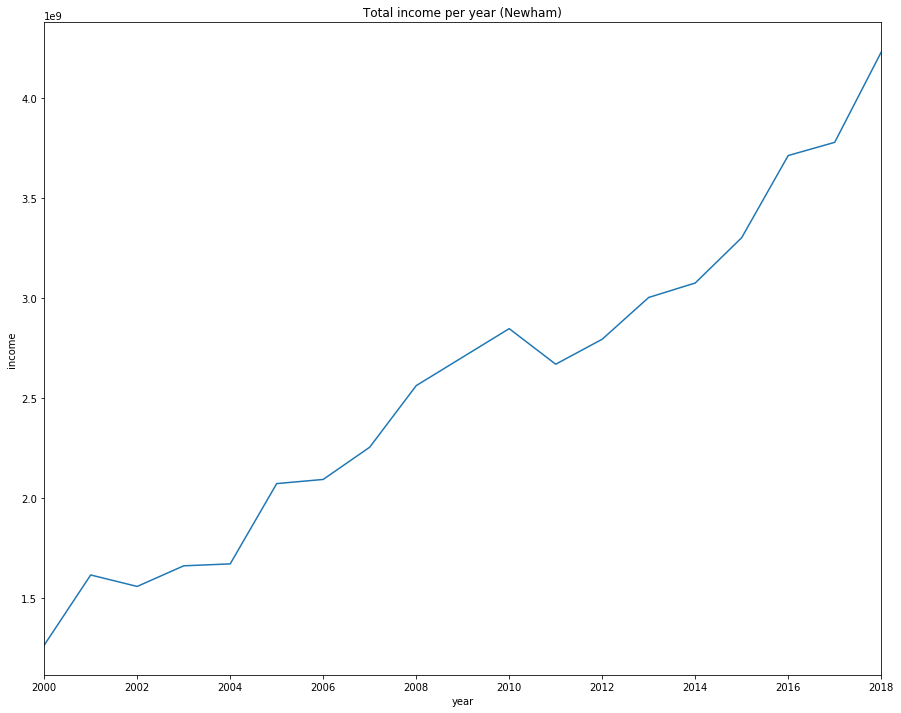

In [42]:
fig, ax = plt.subplots()
total_income_newham = london.loc[london['area']=='Newham', 'total_income']
total_income_newham.plot(ax=ax)
ax.set_ylabel('income');
ax.set_title('Total income per year (Newham)');

#### Income in Vancouver

In [43]:
van_raw = pd.read_csv('../datasets_full/Vancouver/vancouver_turism_indicators.csv', 
                      thousands=',')  # Vancouver, Canada, 2010
van = van_raw.set_index('year')
van.index = van.index.astype('int')

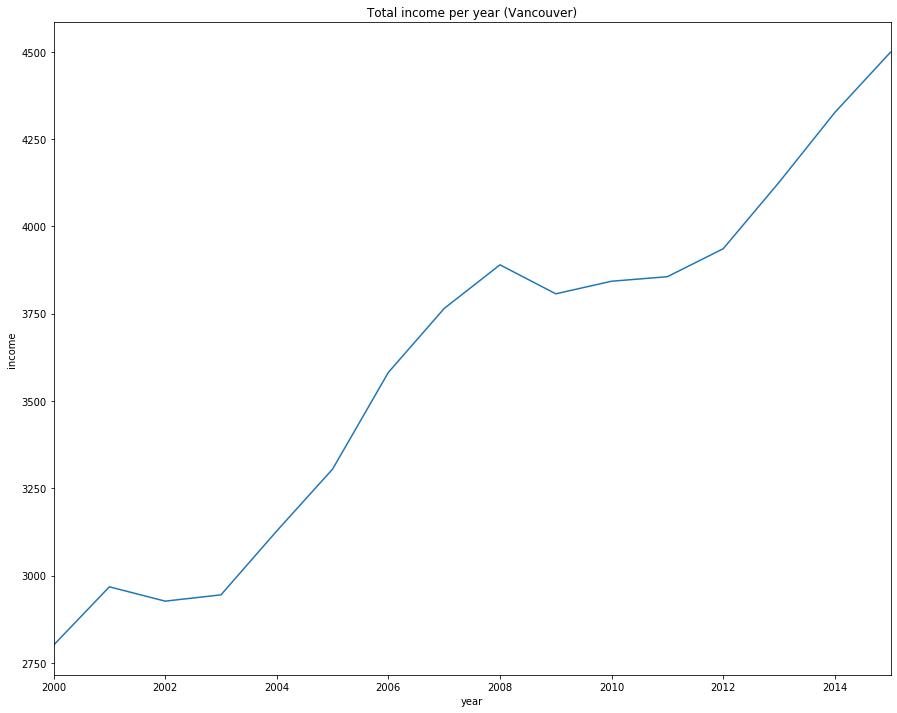

In [44]:
# Vancouver: Total income (in Millions of CAD) since 2000
fig, ax = plt.subplots()
van.loc[:, 'wages_and_salaries'].astype(float).plot(ax=ax);
ax.set_ylabel('income');
ax.set_title('Total income per year (Vancouver)');

### PART3: Housing prices
- London

In [45]:
df = pd.read_csv('../datasets_full/London_more/housing_in_london_monthly.csv')
df_1 = pd.read_csv('../datasets_full/London_more/housing_in_london_yearly.csv')

In [46]:
display(df.describe());
# Set date as index for easier manipulation
df = df.set_index(pd.to_datetime(df['date']))
df_1 = df_1.set_index(pd.to_datetime(df_1['date']))

del df['date']
del df_1['date']

df_1['mean_salary'] = df_1['mean_salary'].replace('-', np.NaN)
df_1['mean_salary'] = df_1['mean_salary'].replace('#', np.NaN)
df_1['mean_salary'] = df_1['mean_salary'].astype(float)

# Create dataset cuts
prices_london = df[df['borough_flag'] == 1]
prices_england = df[df['area'] == 'england']
prices_newham = df[df['area'] == 'newham']

# Calcualte mean prices for the different cuts of data
london_mean_price = prices_london.groupby('date')['average_price'].mean()
england_mean_price = prices_england.groupby('date')['average_price'].mean()
newham_mean_price = prices_newham.groupby('date')['average_price'].mean()

average_price  houses_sold  no_of_crimes  borough_flag
count      13,549.00    13,455.00      7,439.00     13,549.00
mean      263,519.68     3,893.99      2,158.35          0.73
std       187,617.50    12,114.40        902.09          0.44
min        40,722.00         2.00          0.00          0.00
25%       132,380.00       247.00      1,623.00          0.00
50%       222,919.00       371.00      2,132.00          1.00
75%       336,843.00     3,146.00      2,582.00          1.00
max     1,463,378.00   132,163.00      7,461.00          1.00

In [47]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=newham_mean_price.index, 
                         y=newham_mean_price.values,
                         mode='lines',
                         name='Newham Mean House Price',
                        ))

fig.add_trace(go.Scatter(x=london_mean_price.index, 
                         y=london_mean_price.values,
                         mode='lines',
                         name='London Mean House Price',
                        ))

fig.add_trace(go.Scatter(x=england_mean_price.index, 
                         y=england_mean_price.values,
                         mode='lines',
                         name='England Mean House Price',
                        ))


fig.update_layout(
    template='gridon',
    title='Average Monthly House Price',
    xaxis_title='Year',
    yaxis_title='Price (£)',
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    legend=dict(y=-.2, orientation='h'),
    shapes=[
        dict(
            type="line",
            x0='2005-07-01',
            x1='2005-07-01',
            y0=0,
            y1=london_mean_price.values.max()*1.2,
            line=dict(
            color="LightGray",
            dash="dashdot"
            )
        ),
        dict(
            type="rect",
            x0="2007-12-01",
            y0=0,
            x1="2009-06-01",
            y1=london_mean_price.values.max()*1.2,
            fillcolor="LightGray",
            opacity=0.5,
            layer="below",
            line_width=0,
        ),
        dict(
            type="line",
            x0='2012-08-01',
            x1='2012-09-01',
            y0=0,
            y1=london_mean_price.values.max()*1.2,
            line=dict(
            color="LightGray",
            dash="dashdot"
            )
        ),
        dict(
            type="line",
            x0='2016-06-01',
            x1='2016-06-01',
            y0=0,
            y1=london_mean_price.values.max()*1.2,
            line=dict(
            color="LightGray",
            dash="dashdot"
            )
        ),
    ],
    annotations=[
            dict(text="Olympics bidding succeeds", x='2005-07-01', y=london_mean_price.values.max()*1.2),
            dict(text="The Great Recession", x='2007-12-01', y=london_mean_price.values.max()*1.1),
            dict(text="London 2012 Olympics", x='2012-08-01', y=london_mean_price.values.max()*1.2),
            dict(text="Brexit Vote", x='2016-06-01', y=london_mean_price.values.max()*1.1),
    ]
)

fig.show()

In [48]:
london_mean_price_change = (london_mean_price - london_mean_price['1995-01-01'])/london_mean_price['1995-01-01']
newham_mean_price_change = (newham_mean_price - newham_mean_price['1995-01-01'])/newham_mean_price['1995-01-01']
england_mean_price_change = (england_mean_price - england_mean_price['1995-01-01'])/england_mean_price['1995-01-01']

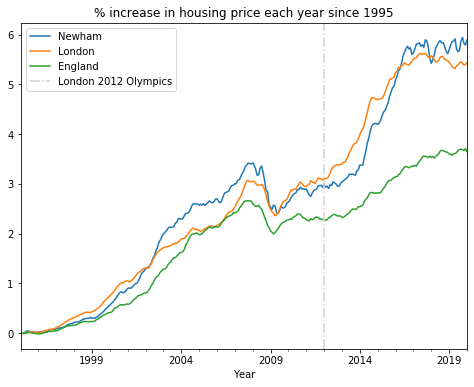

In [49]:
fig, ax = plt.subplots(figsize=(8,6))
pd.plotting.register_matplotlib_converters()
newham_mean_price_change.plot(ax=ax, label='Newham')
london_mean_price_change.plot(ax=ax, label='London')
england_mean_price_change.plot(ax=ax, label='England')
ax.set_title('% increase in housing price each year since 1995')
ax.axvline(x='2012', color='lightgray', linestyle='-.', label='London 2012 Olympics')
ax.set_xlabel('Year')
plt.legend()

In [50]:
yearly_prices_london = prices_london.groupby('area').resample('y')['average_price'].mean()

# Calculate the yealy average price percentage change
yearly_prices_london_pct_ch = yearly_prices_london.groupby(level='area').apply(lambda x: x.pct_change())
# yearly_prices_london_pct_ch = yearly_prices_london.groupby(level='area').apply(lambda x: (x-x[0])/x[0])
yearly_prices_london_pct_ch = yearly_prices_london_pct_ch.unstack()
yearly_prices_london_pct_ch = yearly_prices_london_pct_ch.iloc[::-1]
yearly_prices_london_pct_ch.head()

date            1995-12-31  1996-12-31  1997-12-31  1998-12-31  1999-12-31  \
area                                                                         
westminster            nan        0.04        0.19        0.15        0.12   
wandsworth             nan        0.04        0.17        0.16        0.16   
waltham forest         nan        0.01        0.10        0.11        0.11   
tower hamlets          nan        0.10        0.22        0.13        0.17   
sutton                 nan        0.02        0.13        0.14        0.10   

date            2000-12-31  2001-12-31  2002-12-31  2003-12-31  2004-12-31  \
area                                                                         
westminster           0.22        0.14        0.15        0.07        0.04   
wandsworth            0.27        0.11        0.13        0.09        0.07   
waltham forest        0.23        0.15        0.25        0.18        0.09   
tower hamlets         0.25        0.15        0.15        0.11        0.06   
sutton                0.25        0.09        0.18        0.16        0.07   

date            ...  2011-12-31  2012-12-31  2013-12-31  2014-12-31  \
area            ...                                                   
westminster     ...        0.04        0.10        0.13        0.17   
wandsworth      ...        0.03        0.06        0.12        0.19   
waltham forest  ...       -0.01        0.04        0.10        0.24   
tower hamlets   ...        0.02       -0.01        0.08        0.24   
sutton          ...       -0.00        0.02        0.06        0.16   

date            2015-12-31  2016-12-31  2017-12-31  2018-12-31  2019-12-31  \
area                                                                         
westminster           0.05        0.03        0.07       -0.04       -0.06   
wandsworth            0.05        0.06        0.02       -0.03       -0.01   
waltham forest        0.14        0.16        0.06        0.01       -0.02   
tower hamlets         0.10        0.08        0.00       -0.03       -0.02   
sutton                0.11        0.13        0.03        0.01       -0.02   

date            2020-12-31  
area                        
westminster           0.06  
wandsworth            0.04  
waltham forest        0.05  
tower hamlets         0.03  
sutton               -0.00  

[5 rows x 26 columns]

In [51]:
# Calculate the mean yearly price per borough
yearly_prices_london = prices_london.groupby('area').resample('y')['average_price'].mean()

# Calculate the yealy average price percentage change
yearly_prices_london_pct_ch = yearly_prices_london.groupby(level='area').apply(lambda x: x.pct_change())
# yearly_prices_london_pct_ch = yearly_prices_london.groupby(level='area').apply(lambda x: (x-x[0])/x[0])

yearly_prices_london_pct_ch = yearly_prices_london_pct_ch.unstack()
yearly_prices_london_pct_ch = yearly_prices_london_pct_ch.iloc[::-1]

del yearly_prices_london_pct_ch['1995-12-31']

In [52]:
fig = go.Figure(data=go.Heatmap(
        z=yearly_prices_london_pct_ch.values,
        x=yearly_prices_london_pct_ch.columns,
        y=yearly_prices_london_pct_ch.index,
        colorscale='Viridis'))

fig.update_layout(
    title='Yearly Average London House Price Percentage Change by Borough',
    title_x=0.5,
    yaxis_nticks=33,
    xaxis_title='Year',
    yaxis_title='Borough'
)

fig.show()

In [53]:
# Load the shape file for mapping
map_df = gpd.read_file('../datasets_full/London_more/BoroughsMap/London_Borough_Excluding_MHW.shp')

map_df = map_df[['NAME', 'geometry']]
map_df = map_df.rename(columns={'NAME': 'area'})
map_df['area'] = map_df['area'].str.capitalize()
map_df['area'] = map_df['area'].str.replace('&','and')

yearly_prices_london_df_map = pd.DataFrame(yearly_prices_london)
yearly_prices_london_df_map = yearly_prices_london_df_map.reset_index()

yearly_prices_london_df_map['area'] = [a.capitalize() for a in yearly_prices_london_df_map['area']]
price_map = map_df.set_index('area').join(yearly_prices_london_df_map.set_index('area'))
price_map = price_map.reset_index()

price_map_1 = price_map[price_map['date'] == '2011-12-31']
price_map_2 = price_map[price_map['date'] == '2019-12-31']

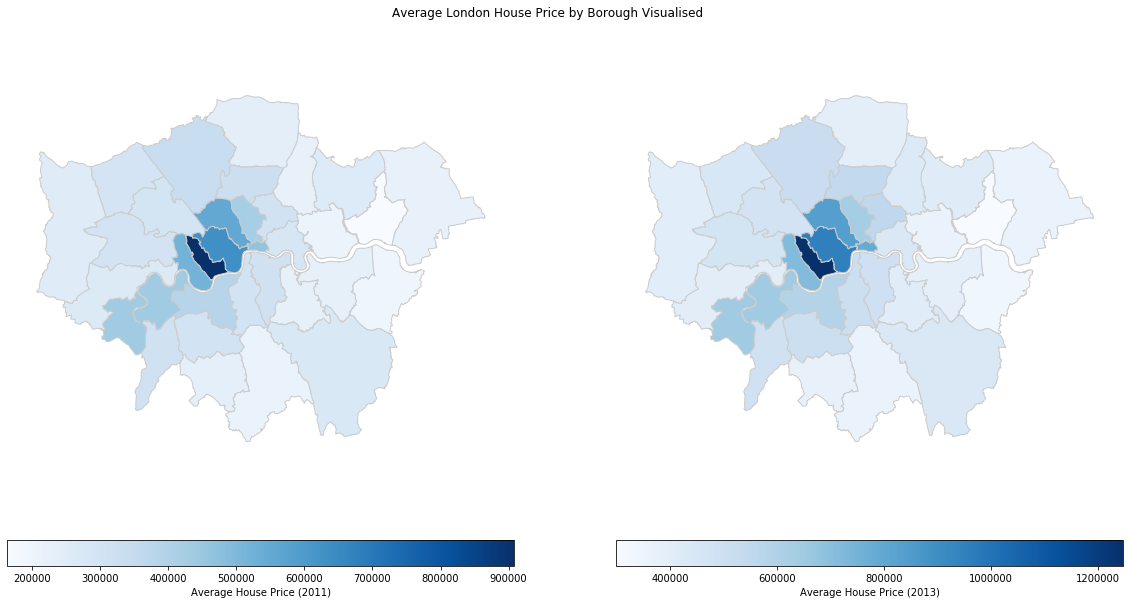

In [54]:
variable = 'average_price'

fig, axes = plt.subplots(1, 2, figsize=(20, 10))
price_map_1.plot(column=variable, 
               cmap='Blues', 
               linewidth=1, 
               ax=axes[0], 
               edgecolor='0.8', 
               legend=True,
               legend_kwds={'label': "Average House Price (2011)",
                           'orientation': "horizontal"})

price_map_2.plot(column=variable, 
               cmap='Blues', 
               linewidth=1, 
               ax=axes[1], 
               edgecolor='0.8', 
               legend=True,
               legend_kwds={'label': "Average House Price (2013)",
                           'orientation': "horizontal"}) 
axes[0].axis('off')
axes[1].axis('off')
plt.suptitle('Average London House Price by Borough Visualised')
plt.show()